Load the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

matrix = pd.read_csv('../MT data/level_1.csv')

In [2]:
year = pd.read_csv("../MT data/year.csv")
year_without_CCS = year.loc[~((year['CCS'] == 1) & (year['Biochar'] == 0) & (year['BECCS'] == 0) & (year['Blue Carbon'] == 0) 
                              & (year["Ocean alkalinity enhancement"] == 0) & (year['Forest Management'] == 0)
                              & (year['Soil Carbon Sequestration'] == 0)
                              & (year['Agroforestry'] == 0) & (year['Enhanced Weathering (land based)'] == 0)
                              & (year['Ocean fertilization & Artificial upwelling'] == 0)
                              & (year["DAC(CS)"] == 0) & (year['General Literature on CDR/NET'] == 0)
                              & (year["AR"] == 0)  & (year["restoration of landscapes/peats"] == 0)),:]

matrix = pd.merge(matrix, year_without_CCS[['id']], on='id', how='inner')
mask = matrix["Relevance"] == 1
matrix = matrix.loc[mask]

Prepare the data

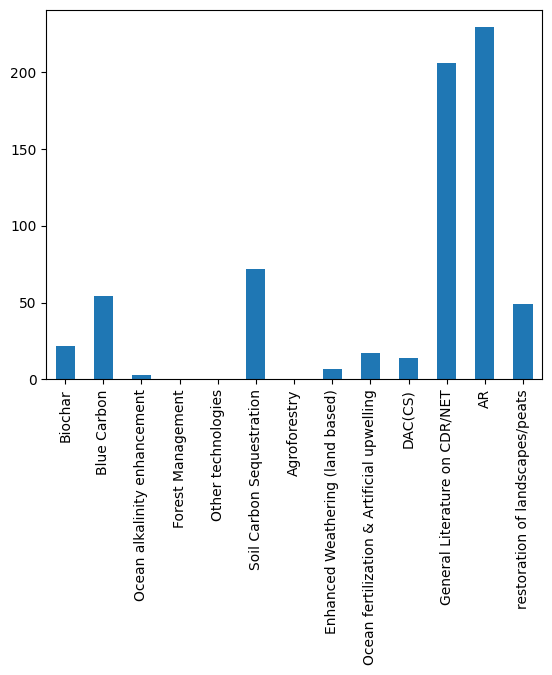

In [3]:
selected_technologies = ["Biochar", 
                         "Blue Carbon", 
                         "Ocean alkalinity enhancement", 
                         "Forest Management",
                         "Other technologies",
                         "Soil Carbon Sequestration",
                         "Agroforestry",
                         "Enhanced Weathering (land based)",
                         "Ocean fertilization & Artificial upwelling",
                         "DAC(CS)",
                         "General Literature on CDR/NET",
                         "AR",
                         "restoration of landscapes/peats"]

sum_selected_technologies = matrix[selected_technologies].sum()
sum_selected_technologies.plot(kind='bar')
plt.show()


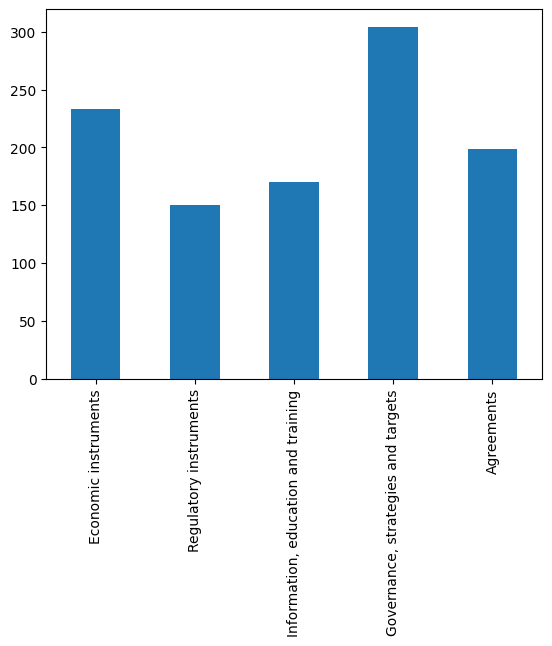

In [4]:
selected_policies = ["Economic instruments",
                     "Regulatory instruments",
                     "Information, education and training",
                     "Governance, strategies and targets",
                     "Agreements"]

sum_selected_policies = matrix[selected_policies].sum()
sum_selected_policies.plot(kind='bar')
plt.show()

Prepare the data for Matrix

In [5]:
matrix = matrix.rename(columns={'AR': 'Afforestation', 
                                'restoration of landscapes/peats': 'Peatland & Wetland Restoration', 
                                "Enhanced Weathering (land based)": "Enhanced Weathering",
                                "DAC(CS)": "DACCS"})
specific_columns = ["General Literature on CDR/NET", 
                    "Afforestation", 
                    "Forest Management",
                    "Agroforestry",
                    "Biochar",
                    "Soil Carbon Sequestration",
                    "Peatland & Wetland Restoration",
                    "Enhanced Weathering",
                    "Ocean alkalinity enhancement",
                    "Ocean fertilization & Artificial upwelling",
                    "Blue Carbon",
                    "BECCS",
                    "DACCS"]

df_filtered_econ = matrix[matrix['Economic instruments'] == 1]
result_econ = df_filtered_econ[specific_columns].sum(axis=0)

df_filtered_reg = matrix[matrix['Regulatory instruments'] == 1]
result_reg = df_filtered_reg[specific_columns].sum(axis=0)

df_filtered_info = matrix[matrix['Information, education and training'] == 1]
result_info = df_filtered_info[specific_columns].sum(axis=0)

df_filtered_gov = matrix[matrix['Governance, strategies and targets'] == 1]
result_gov = df_filtered_gov[specific_columns].sum(axis=0)

df_filtered_agree = matrix[matrix['Agreements'] == 1]
result_agree = df_filtered_agree[specific_columns].sum(axis=0)


In [6]:
new_matrix = pd.concat([result_econ, result_reg, result_info, result_gov, result_agree], axis =1)
new_col_names = {0: 'Economic instruments', 
                 1: 'Regulatory instruments', 
                 2: 'Information, education and training', 
                 3: 'Governance, strategies and targets', 
                 4: 'Agreements'}
new_matrix = new_matrix.rename(columns=new_col_names)

In [7]:
row_totals = matrix[["General Literature on CDR/NET", 
         "Afforestation", 
         "Forest Management",
         "Agroforestry",
         "Biochar",
         "Soil Carbon Sequestration",
         "Peatland & Wetland Restoration",
         "Enhanced Weathering",
         "Ocean alkalinity enhancement",
         "Ocean fertilization & Artificial upwelling",
         "Blue Carbon",
         "BECCS",
         "DACCS"]].sum()

In [8]:
col_totals = matrix[['Economic instruments', 'Regulatory instruments', 
           'Information, education and training', 'Governance, strategies and targets', 'Agreements']].sum()

Get the heatmap

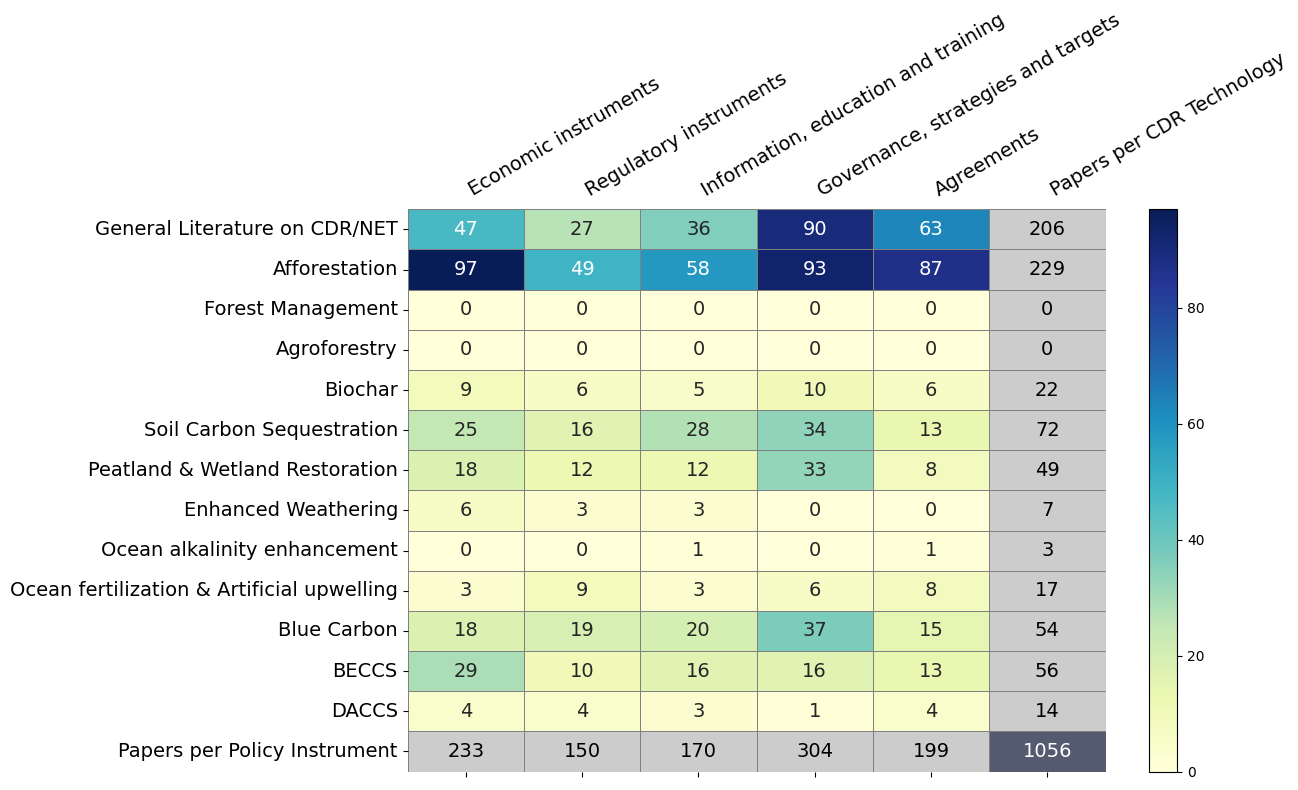

In [9]:
import seaborn as sns
import numpy as np

#Calculate the total number
total_data = np.vstack([np.hstack([new_matrix, row_totals.values.reshape(-1, 1)]),
                        np.append(col_totals, np.sum(col_totals))])

#Get relevant columns and technologies
columns = ['Economic instruments', 'Regulatory instruments', 
           'Information, education and training', 'Governance, strategies and targets', 'Agreements', 'Papers per CDR Technology']
index = ["General Literature on CDR/NET", 
         "Afforestation", 
         "Forest Management",
         "Agroforestry",
         "Biochar",
         "Soil Carbon Sequestration",
         "Peatland & Wetland Restoration",
         "Enhanced Weathering",
         "Ocean alkalinity enhancement",
         "Ocean fertilization & Artificial upwelling",
         "Blue Carbon",
         "BECCS",
         "DACCS", 'Papers per Policy Instrument']

total_df = pd.DataFrame(total_data, columns=columns, index=index)

#Create a mask to exclude the total column and row from the colormap
mask = np.zeros_like(total_data)
mask[-1,:] = True
mask[:,-1] = True
mask[-1,-1] = False

plt.figure(figsize=(13, 8))

#Use the mask and set the color of the total column and row to grey
ax = sns.heatmap(data=total_data, annot=True, cmap='YlGnBu', mask=mask, 
                 xticklabels = columns, yticklabels = index, linecolor='grey', linewidths=0.5, 
                 cbar=False, annot_kws={"fontsize":14}, fmt='.0f', vmin=np.min(total_data[:-1,:-1]), 
                 vmax=np.max(total_data[:-1,:-1]), center=np.max(total_data[:-1,:-1])/2)

ax.add_patch(plt.Rectangle((0, len(index)-1), len(columns), 1, fill=True, facecolor='grey', linewidth=0, alpha=0.4))
ax.add_patch(plt.Rectangle((len(columns)-1, 0), 1, len(index), fill=True, facecolor='grey', linewidth=0, alpha=0.4))


# Add the total number in the total column and row
for i in range(len(index)-1):
    ax.text(len(columns)-0.5, i+0.5, str(int(total_data[i,-1])), ha='center', va='center', color='black', fontsize =14)
for j in range(len(columns)-1):
    ax.text(j+0.5, len(index)-0.5, str(int(total_data[-1,j])), ha='center', va='center', color='black', fontsize = 14)

# Create legend and colors
cbar = ax.figure.colorbar(ax.collections[0])
ax.tick_params(axis='x', labelbottom=False, labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='left', fontsize = 14)
ax.set_yticklabels(ax.get_yticklabels(),fontsize = 14)

plt.tight_layout() 
plt.savefig('../MT data/Matrix_CDR_policy.png', dpi=300, bbox_inches='tight')
plt.show()

Faceted Plot

In [10]:
#Load the data
level_2 = pd.read_csv('/Users/annamohn/Desktop/Hertie School/MT data/level_2.csv')

In [11]:
#Merge the data
df = pd.merge(level_2, year_without_CCS[['id']], on='id', how='inner')
df = df.rename(columns={'AR': 'Afforestation', 'restoration of landscapes/peats': 'Peatland and Wetland Restoration', "Enhanced Weathering (land based)": "Enhanced Weathering"})


# Loop through the table and replace None with 0
for col in df.columns:
    df[col] = df[col].replace(np.nan, 0)

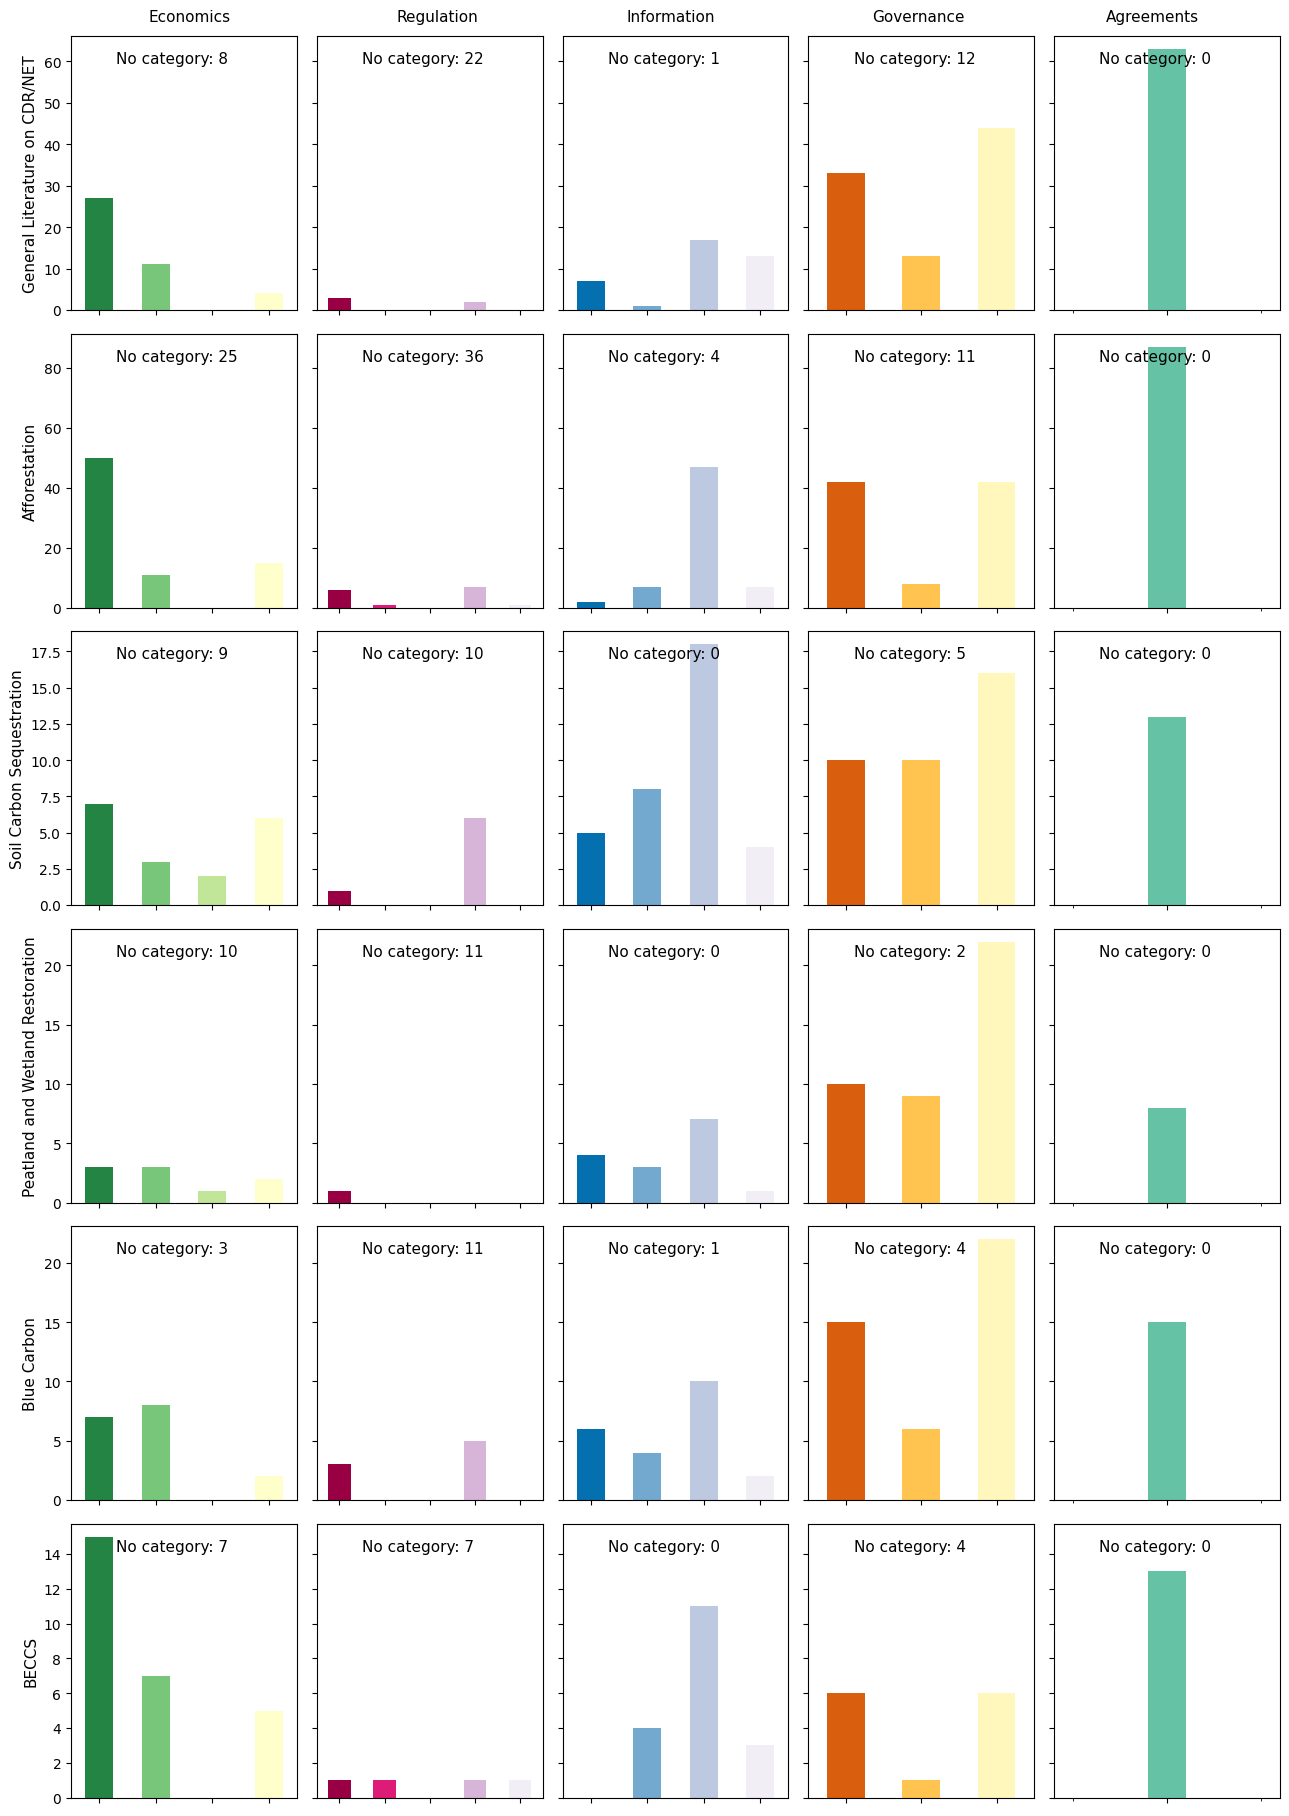

In [13]:
import matplotlib.pyplot as plt

#List of technologies
tech_names = ['General Literature on CDR/NET', "Afforestation", 
              "Soil Carbon Sequestration", "Peatland and Wetland Restoration", "Blue Carbon", "BECCS" ]

#Create a faceted plot
fig, axs = plt.subplots(len(tech_names), 5, figsize=(13, 3*len(tech_names)), sharex='col', sharey='row')

# Loop through each technology to get the values for every technology
for i, tech_name in enumerate(tech_names):
    # Create a subset of the data where "Economic instruments" is 1 and the other technologies are zero
    subset = df[(df["Economic instruments"] == 1) & 
                (df["Carbon pricing"] == 0) & 
                (df["Direct Investment / spending"] == 0) & 
                (df["Non-carbon taxes"] == 0) & 
                (df["Subsidies"] == 0) &
                (df[tech_name] == 1)]

    #Calculate the sum of the values in the technology column for the selected rows
    tech_value = subset[tech_name].sum()
    
    #Plot the economic values
    colors_econ = ['#238443', '#78c679','#c2e699','#ffffcc'] 
    economic = df[df[tech_name] == 1][['Carbon pricing', 'Direct Investment / spending', 'Non-carbon taxes', 'Subsidies']].sum()
    ax1 = economic.plot(kind='bar', color = colors_econ, ax=axs[i,0], label = "economic")
    ax1.set_xticklabels([])
    axs[i,0].text(0.2, 0.9, f"No category: {tech_value}",transform=ax1.transAxes, fontsize = 11)
    ax1.set_ylabel(tech_name, fontsize = 11)
    
    #This process is not repeated for all technologies: regulatory instruments
    subset = df[(df["Regulatory instruments"] == 1) & 
                (df["Standards"] == 0) & 
                (df["Quotas"] == 0) & 
                (df["Regulation on transactions"] == 0) & 
                (df["Spatial and land-use planning"] == 0) &
                (df["Trade policy"] == 0) &
                (df[tech_name] == 1)]

    tech_value = subset[tech_name].sum()
    colors_reg = ['#980043', '#dd1c77', '#df65b0','#d7b5d8','#f1eef6'] 
    regulatory = df[df[tech_name] == 1][['Standards', 'Quotas', 'Regulation on transactions', 'Spatial and land-use planning', 'Trade policy']].sum()
    ax2 = regulatory.plot(kind='bar', color = colors_reg, ax=axs[i,1])
    ax2.set_xticklabels([])
    axs[i,1].text(0.2, 0.9, f"No category: {tech_value}",transform=axs[i,1].transAxes, fontsize = 11)
    axs[i,1].set_ylabel(tech_name, fontsize = 11)

    #Information
    subset = df[(df["Information, education and training"] == 1) & 
                (df["Public Information/awareness campaigns"] == 0) & 
                (df["Education and training"] == 0) & 
                (df["Standardized labels, reporting and accounting standards and certification schemes"] == 0) & 
                (df["Publication of data / analysis"] == 0) & 
                (df[tech_name] == 1)]

    tech_value = subset[tech_name].sum()
    colors_info = ['#0570b0', '#74a9cf', '#bdc9e1','#f1eef6'] 
    info = df[df[tech_name] == 1][['Public Information/awareness campaigns', 
                                   'Education and training', 
                                   'Standardized labels, reporting and accounting standards and certification schemes', 
                                   'Publication of data / analysis']].sum()
    ax3 = info.plot(kind='bar', color = colors_info, ax=axs[i,2])
    ax3.set_xticklabels([])
    axs[i,2].text(0.2, 0.9, f"No category: {tech_value}",transform=axs[i,2].transAxes, fontsize = 11)
    axs[i,2].set_ylabel(tech_name, fontsize = 11)

    #Governance
    subset = df[(df["Governance, strategies and targets"] == 1) & 
                (df["Planning"] == 0) & 
                (df["Government administration & management"] == 0) & 
                (df["Institutions"] == 0) & 
                (df[tech_name] == 1)]

    tech_value = subset[tech_name].sum()
    colors_gov = ['#d95f0e','#fec44f','#fff7bc'] 
    gov = df[df[tech_name] == 1][['Planning', 
                                   'Government administration & management', 
                                   'Institutions']].sum()
    ax4 = gov.plot(kind='bar', color = colors_gov, ax=axs[i,3])
    ax4.set_xticklabels([])
    axs[i,3].text(0.2, 0.9, f"No category: {tech_value}",transform=axs[i,3].transAxes, fontsize = 11)
    axs[i,3].set_ylabel(tech_name, fontsize = 11)

    # Agreements: here only one category
    colors_agree = ['#66c2a5'] 
    agree = df[df[tech_name] == 1][['Agreements']].sum()
    ax5 = agree.plot(kind='bar', color = colors_agree, ax=axs[i,4], width=0.1)
    ax5.set_xticklabels([])
    axs[i,4].text(0.2, 0.9, f"No category: 0",transform=axs[i,4].transAxes, fontsize = 11)
    axs[i,4].set_ylabel(tech_name, fontsize = 11)
    axs[i,4].tick_params(axis='both', which='major', labelsize=14)
    
    if i == len(tech_names) - 1:
        axs[i,0].set_xlabel("") # Set empty label for x-axis
        axs[i,1].set_xlabel("") # Set empty label for x-axis
        axs[i,2].set_xlabel("") # Set empty label for x-axis
        axs[i,3].set_xlabel("") # Set empty label for x-axis
        axs[i,4].set_xlabel("") # Set empty label for x-axis

#Set x label for all plots
fig.text(0.15, 1, "Economics", ha='center', fontsize=11)
fig.text(0.34, 1, "Regulation", ha='center', fontsize=11)
fig.text(0.52, 1, "Information", ha='center', fontsize=11)
fig.text(0.71, 1, "Governance", ha='center', fontsize=11)
fig.text(0.89, 1, "Agreements", ha='center', fontsize=11)

for ax in axs.flat:
    ax.tick_params(axis='y', labelsize=10)

# Adjust spacing between subplots
fig.tight_layout()

#Show the plot
plt.show()

fig.savefig('../MT data/faceted_plot.png', dpi=300, bbox_inches='tight')

Create the legends

/var/folders/hx/r9c1jp511v15x5_0hmwf10p80000gn/T/ipykernel_10093/1798855956.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regulation = df[df['Afforestation'] == 1].groupby('Afforestation').sum()


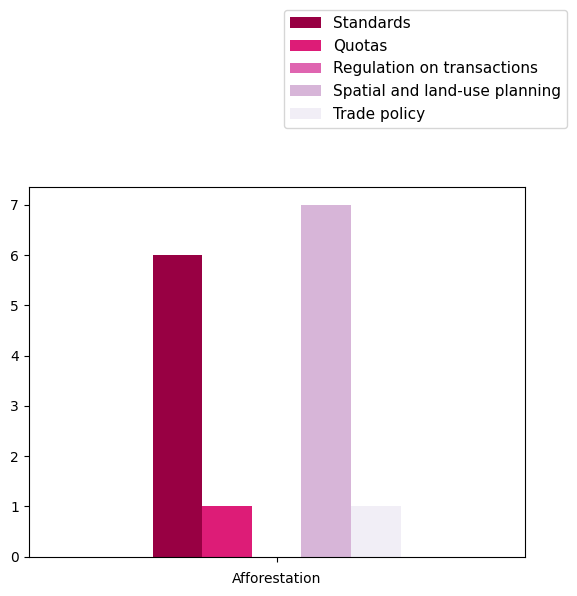

In [15]:
#Legend Regulatory instruments
regulation = df[df['Afforestation'] == 1].groupby('Afforestation').sum()
all_reg = ['Standards', 'Quotas', 'Regulation on transactions', 'Spatial and land-use planning', 'Trade policy']
regulation = regulation[all_reg]
colors_reg = ['#980043', '#dd1c77', '#df65b0','#d7b5d8','#f1eef6']
ax = regulation.plot(kind='bar', color= colors_reg)
ax.set_xticklabels([])

plt.legend(loc="upper left", bbox_to_anchor=(0.5,1.5), fontsize = 11)
plt.savefig('../MT data/legend_reg.png', dpi=300, bbox_inches='tight')


/var/folders/hx/r9c1jp511v15x5_0hmwf10p80000gn/T/ipykernel_75809/1126266839.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  economic = df[df['Afforestation'] == 1].groupby('Afforestation').sum()


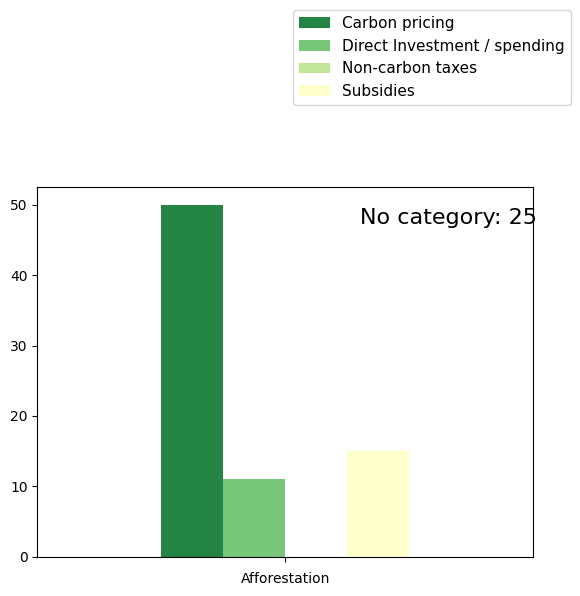

In [26]:
#Legend economic instruments

economic = df[df['Afforestation'] == 1].groupby('Afforestation').sum()
all_econ = ['Carbon pricing', 'Direct Investment / spending', 'Non-carbon taxes', 'Subsidies']
economic = economic[all_econ]
colors_econ = ['#238443', '#78c679','#c2e699','#ffffcc']
ax = economic.plot(kind='bar', color= colors_econ)
ax.set_xticklabels([])

plt.legend(loc="upper left", bbox_to_anchor=(0.5,1.5), fontsize = 11)
plt.savefig('../MT data/legend_econ.png', dpi=300, bbox_inches='tight')

/var/folders/hx/r9c1jp511v15x5_0hmwf10p80000gn/T/ipykernel_75809/1293008489.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  info = df[df['Afforestation'] == 1].groupby('Afforestation').sum()


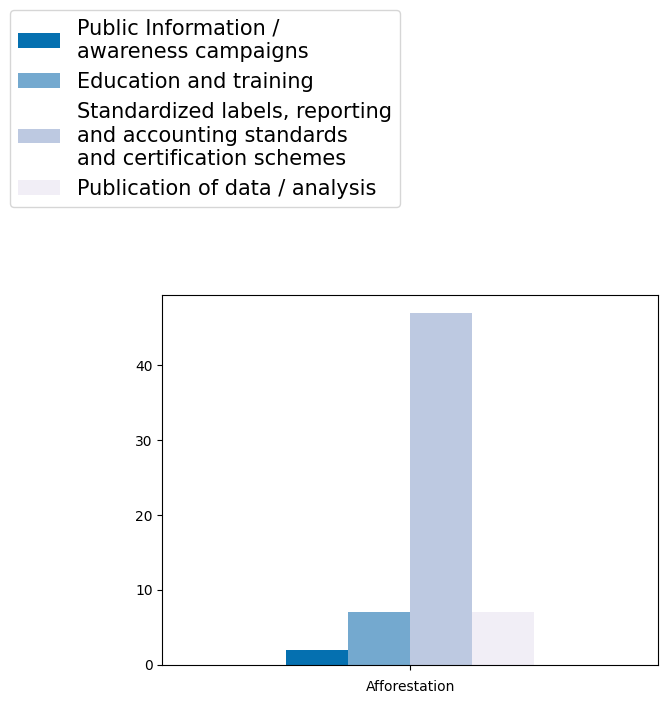

In [37]:
#Legend Information
info = df[df['Afforestation'] == 1].groupby('Afforestation').sum()
all_info = ['Public Information/awareness campaigns', 
                                   'Education and training', 
                                   'Standardized labels, reporting and accounting standards and certification schemes', 
                                   'Publication of data / analysis']
info = info[all_info]
colors_info = ['#0570b0', '#74a9cf', '#bdc9e1','#f1eef6']
ax = info.plot(kind='bar', color= colors_info)
ax.set_xticklabels([])

labels = ['Public Information /\nawareness campaigns', 
                                   'Education and training', 
                                   'Standardized labels, reporting\nand accounting standards\nand certification schemes', 
                                   'Publication of data / analysis']


plt.legend(labels, bbox_to_anchor=(0.5,1.8), fontsize = 15)
plt.savefig('../MT data/legend_info.png', dpi=300, bbox_inches='tight')

/var/folders/hx/r9c1jp511v15x5_0hmwf10p80000gn/T/ipykernel_75809/306966295.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gov = df[df['Afforestation'] == 1].groupby('Afforestation').sum()


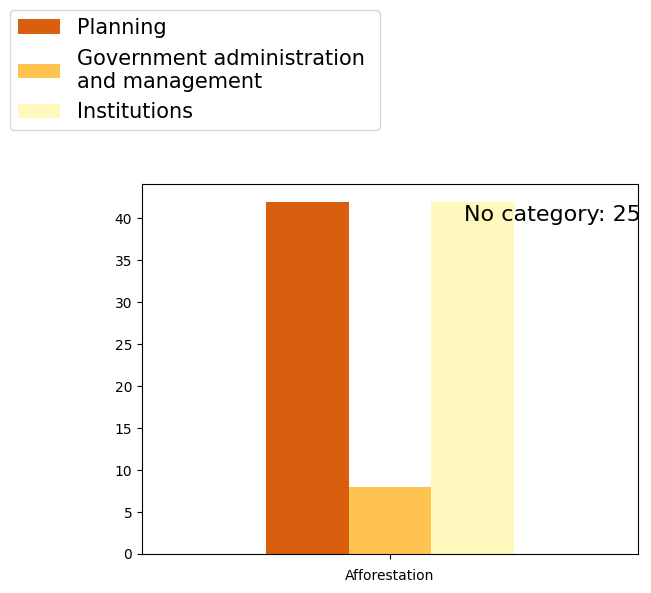

In [36]:
#Legend Governance

gov = df[df['Afforestation'] == 1].groupby('Afforestation').sum()
all_gov = ['Planning', 'Government administration & management', 'Institutions']
gov = gov[all_gov]
colors_gov = ['#d95f0e','#fec44f','#fff7bc'] 
ax = gov.plot(kind='bar', color= colors_gov)
ax.set_xticklabels([])

plt.legend(loc="upper left", bbox_to_anchor=(0.5,1.5), fontsize = 11)

labels = ['Planning', 'Government administration \nand management', 'Institutions']


plt.legend(labels, bbox_to_anchor=(0.5,1.5), fontsize = 15)
plt.savefig('../MT data/legend_gov.png', dpi=300, bbox_inches='tight')

/var/folders/hx/r9c1jp511v15x5_0hmwf10p80000gn/T/ipykernel_75809/3275920782.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agree = df[df['Afforestation'] == 1].groupby('Afforestation').sum()


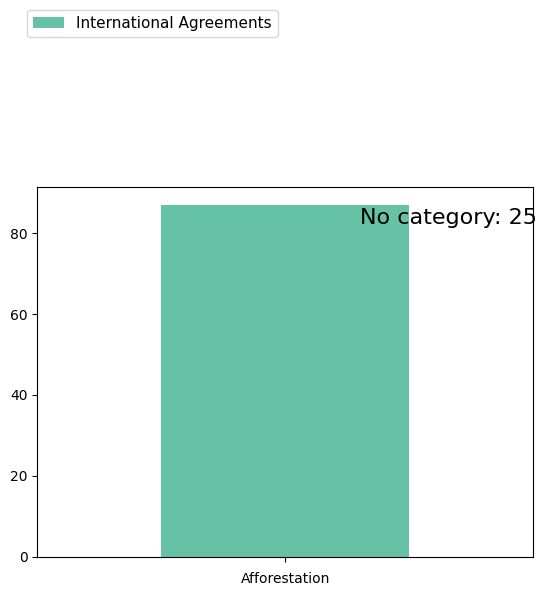

In [29]:
#Legend agreements

agree = df[df['Afforestation'] == 1].groupby('Afforestation').sum()
all_agree = ['Agreements']
agree = agree[all_agree]
colors_agree = ['#66c2a5'] 
ax = agree.plot(kind='bar', color= colors_agree)
ax.set_xticklabels([])

plt.legend(loc="upper left", bbox_to_anchor=(0.5,1.5), fontsize = 11)
labels = ['International Agreements']
plt.legend(labels, bbox_to_anchor=(0.5,1.5), fontsize = 11)
plt.savefig('../MT data/legend_agree.png', dpi=300, bbox_inches='tight')

Information on level 3

In [21]:
level_3 = pd.read_csv('../MT data/level_3.csv')
level_3 = pd.merge(level_3, matrix, on='id', how='inner')

,id,Tax,Subsidy/ compensation/ allowance,Feed in tariffs,Emissions trading,Subsidy removal,Other non-carbon taxes,Infrastructure Investments,R&D investments,International investments,...,Forest Management,Other technologies,Soil Carbon Sequestration,Agroforestry,Enhanced Weathering,Ocean fertilization & Artificial upwelling,DACCS,General Literature on CDR/NET,Afforestation,Peatland & Wetland Restoration
0,441,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,...,0,0,0,0,0,0,0,0,1,0
1,2287,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
2,5831,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,...,0,0,0,0,0,0,0,1,0,0
3,8547,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,...,0,0,0,0,0,0,0,0,1,0
4,9109,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,5345314,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
680,5345982,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,...,0,0,0,0,0,0,0,1,0,0
681,5346802,0.0,1.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,...,0,0,0,0,0,0,0,1,0,0
682,5346923,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,...,0,0,0,0,0,0,0,1,0,0


In [24]:
#Exemplary - done for all relevant technolgies
count = ((level_3['Peatland & Wetland Restoration'] == 1) & (level_3['Stakeholder Engagement'] == 1)).sum()
print(count)
count_ex = ((level_3['Peatland & Wetland Restoration'] == 1) & (level_3['Expert advice'] == 1)).sum()
print(count_ex)
count_pol = ((level_3['Peatland & Wetland Restoration'] == 1) & (level_3['Policy Coordination'] == 1)).sum()
print(count_pol)

12
2
9


In [25]:
count = ((level_3['Afforestation'] == 1) & (level_3['Tax'] == 1)).sum()
print(count)
count_ex = ((level_3['Afforestation'] == 1) & (level_3['Subsidy/ compensation/ allowance'] == 1)).sum()
print(count_ex)
count_pol = ((level_3['Afforestation'] == 1) & (level_3['Emissions trading'] == 1)).sum()
print(count_pol)

5
3
18
